# Importing Dataset and Libraries

This is a wine dataset. We attempt to predict the quality of white wine based on physicochemical tests. More information available at: https://archive.ics.uci.edu/dataset/186/wine+quality

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn as sk
col_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
# load dataset
product = pd.read_csv('https://raw.githubusercontent.com/kyliequinney/WineQualityData/main/dataset/winequality-white.csv', delimiter= ";")
product.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Preprocessing

In [ ]:
df = product.copy()

In [ ]:
# check for null values, missing data, inconsistencies
df.isnull().sum()

df.isna().sum()

df.shape
df.drop_duplicates(inplace=True)
df.shape

(3961, 12)

In [ ]:
#number of rows with quality = x
print(df[df['quality'] == 3].shape)
print(df[df['quality'] == 4].shape)
print(df[df['quality'] == 5].shape)
print(df[df['quality'] == 6].shape)
print(df[df['quality'] == 7].shape)
print(df[df['quality'] == 8].shape)
print(df[df['quality'] == 9].shape)


(20, 12)
(153, 12)
(1175, 12)
(1788, 12)
(689, 12)
(131, 12)
(5, 12)


In [ ]:
# new column says whether quality is above or below 5
df['quality'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

In [ ]:
# convert any categorical data to numerical
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [ ]:
# summary of attributes // target = rings
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,0.659682
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.473876
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,1.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [ ]:
# standardize/ normalize attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df['quality']
X = df.drop(['quality'], axis=1)
X_scaled = scaler.fit_transform(X)

In [ ]:
# After scaling X, the columns should now have mean of 0 and variance of 1
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03
mean,-7.462403e-16,1.524770e-16,-2.870155e-17,1.542708e-16,-5.166279e-16,1.022493e-16,2.296124e-16,1.254258e-14,1.313096e-15,-5.238033e-16,-1.865601e-16
std,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00
min,-3.506599e+00,-1.938986e+00,-2.730789e+00,-1.093352e+00,-1.597636e+00,-1.911289e+00,-2.972698e+00,-2.299932e+00,-3.137791e+00,-2.381769e+00,-2.127792e+00
25%,-6.222624e-01,-6.820247e-01,-5.254587e-01,-8.876343e-01,-4.720853e-01,-6.909155e-01,-7.233509e-01,-7.470245e-01,-6.959724e-01,-7.078848e-01,-8.951743e-01
50%,-4.539499e-02,-1.985781e-01,-1.170642e-01,-2.499098e-01,-1.690523e-01,-1.097853e-01,-9.724396e-02,-9.969269e-02,-1.020166e-01,-9.119074e-02,-1.556039e-01
75%,5.314724e-01,4.782472e-01,4.546882e-01,6.141042e-01,1.772711e-01,5.875709e-01,6.679979e-01,6.612666e-01,6.239293e-01,5.255033e-01,6.661410e-01
max,8.492243e+00,7.923326e+00,1.082791e+01,1.231944e+01,1.299124e+01,1.476715e+01,7.021824e+00,1.556023e+01,4.121669e+00,5.194758e+00,2.967027e+00


<Axes: >

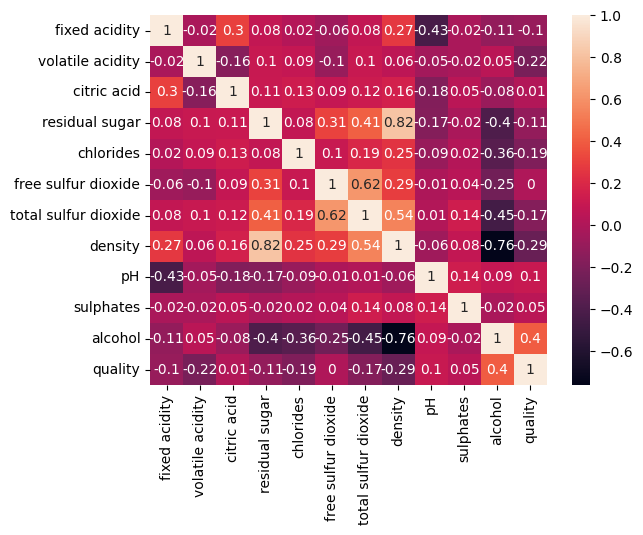

In [ ]:
# find how attributes are correlated to each other and the target variable
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<Axes: xlabel='density', ylabel='Count'>

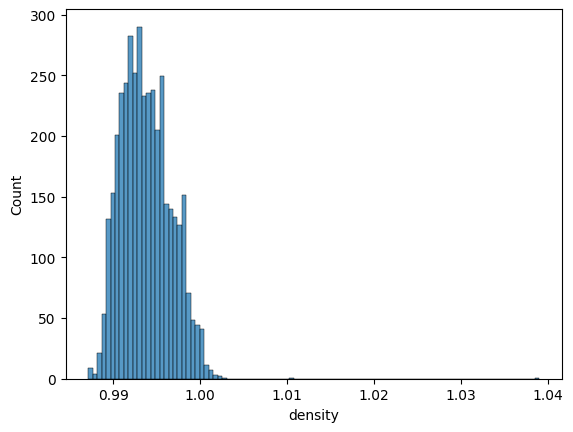

In [ ]:
# plot histogram of our chosen attributes
sns.histplot(df['density'])

<Axes: xlabel='alcohol', ylabel='Count'>

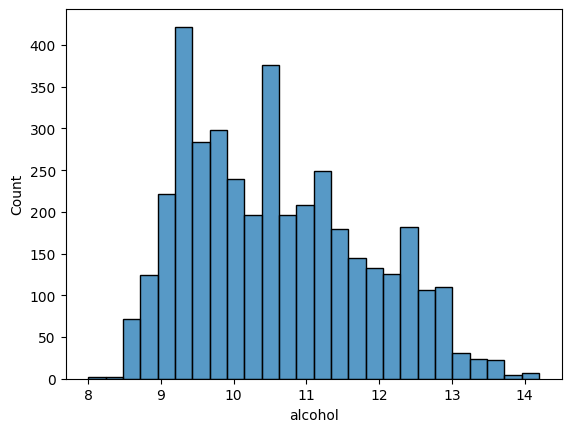

In [ ]:
sns.histplot(df['alcohol'])

<Axes: xlabel='chlorides', ylabel='Count'>

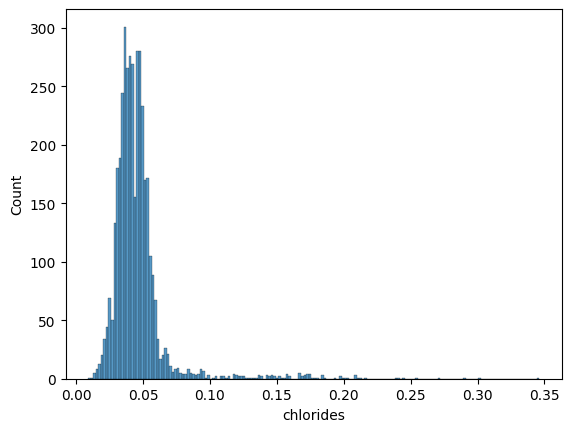

In [ ]:
sns.histplot(df['chlorides'])

<Axes: xlabel='volatile acidity', ylabel='Count'>

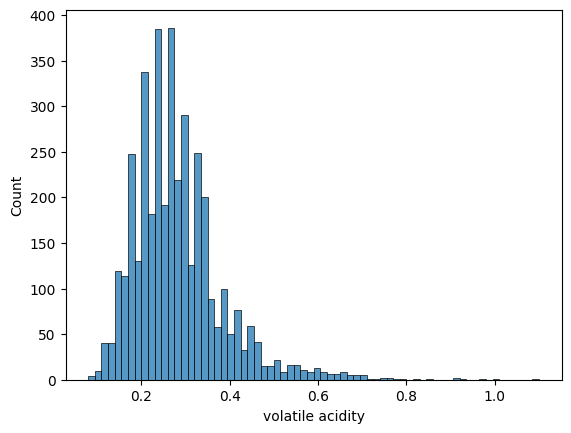

In [ ]:
sns.histplot(df['volatile acidity'])

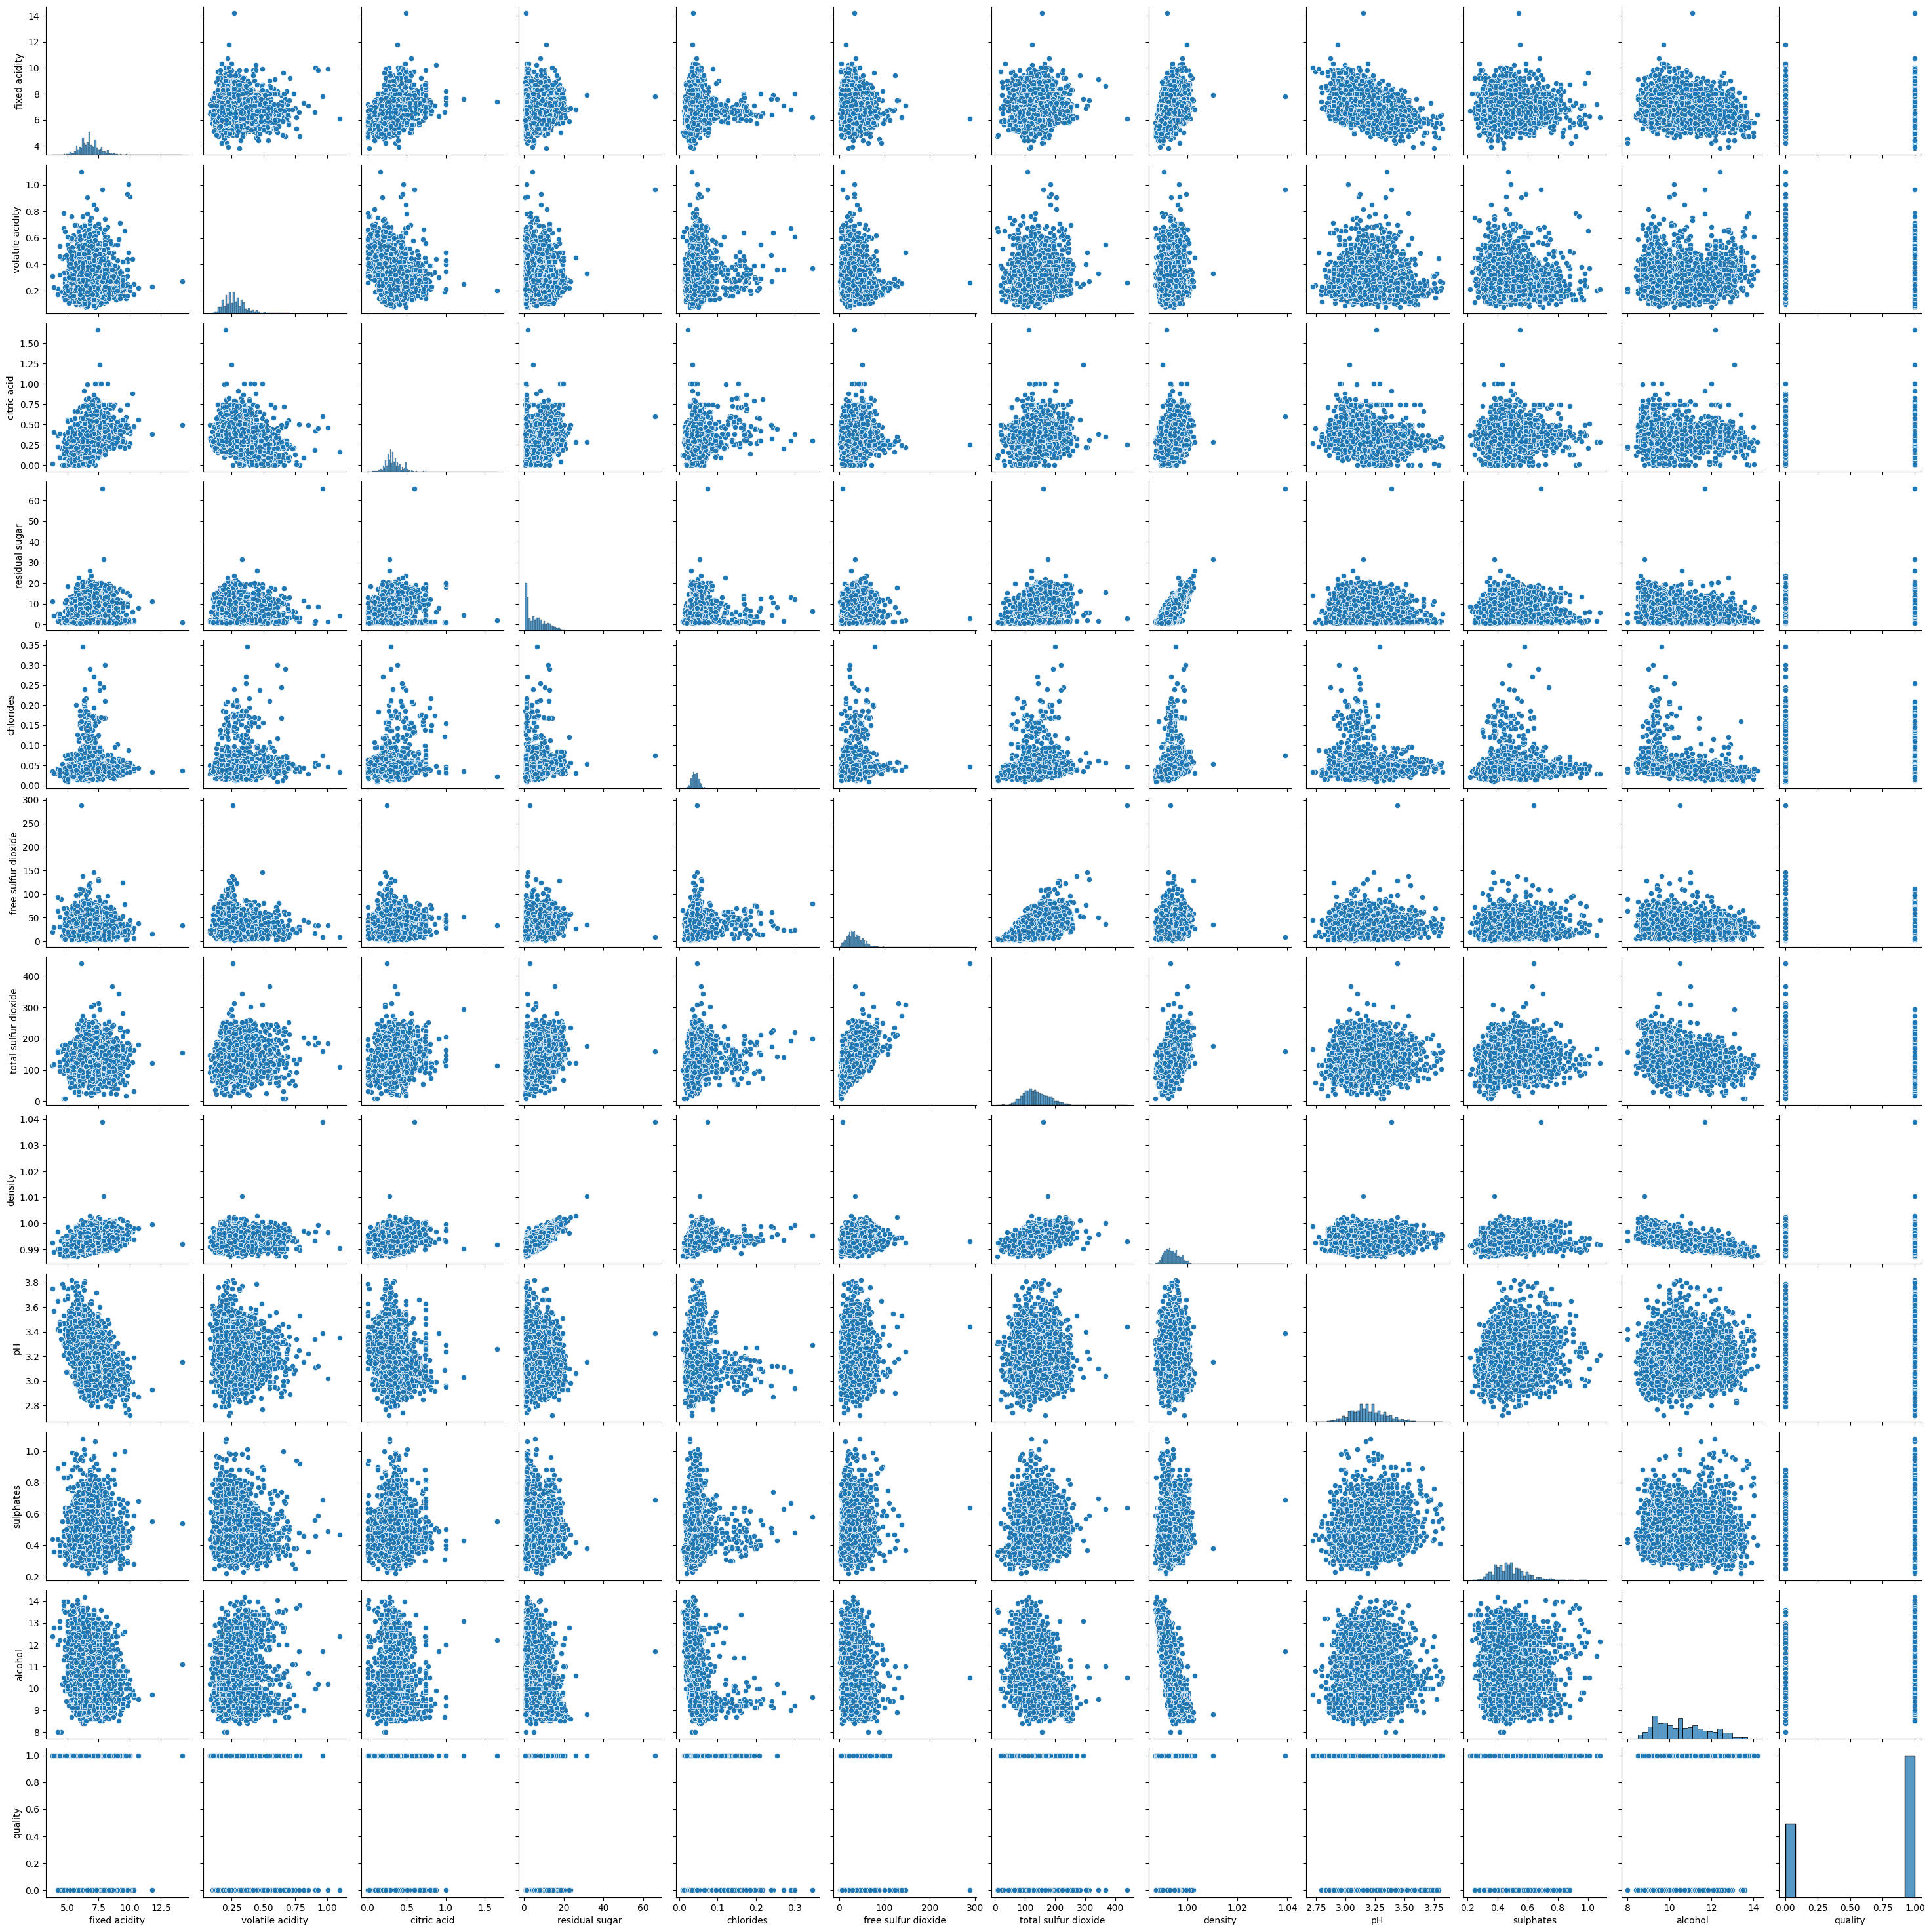

In [ ]:
# pairplots
sns.pairplot(df)

In [ ]:
# identify a few important attributes and move forward
features = ['density', 'alcohol', 'chlorides', 'volatile acidity']

<Axes: >

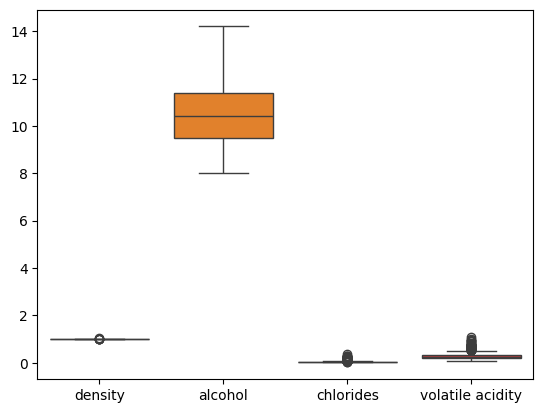

In [ ]:
sns.boxplot(data=df[features])

In [ ]:
X_scaled = X_scaled[features]

In [ ]:
# split the data into testing and training parts (ratio is up to us)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [ ]:
X_train.shape, X_test.shape

((3168, 4), (793, 4))

# Plain Decision Tree Classifier

## Model Creation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
params = [{ 'max_depth': [5, 7, 10],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05]
          }]

# find best hyper params
gs_dt = GridSearchCV( estimator=DecisionTreeClassifier(random_state = 0),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_params_)

# find best model score
print(gs_dt.score(X_test, y_test))


{'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7389659520807061


In [ ]:
# create decision tree classifier object
dt = DecisionTreeClassifier(random_state = 0, max_depth = 7, min_samples_split = 2, min_samples_leaf=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [ ]:
#Predict the response for test dataset
dt_pred = dt.predict(X_test)

In [ ]:
dt_probas = dt.predict_proba(X_test)

## Tree Visualization and Result Analysis

### Tree Visualization

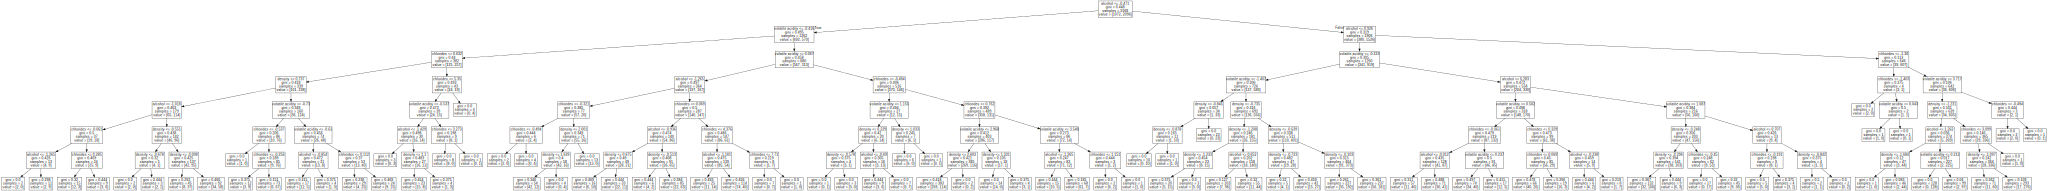

In [ ]:
#visualize using graphviz or treeviz
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt, out_file = None,
               feature_names =['density', 'alcohol', 'chlorides', 'volatile acidity'])
graph = graphviz.Source(dot_data)
graph

### Classification Report

In [ ]:
#performance metrics
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, dt_pred)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', dt_pred)
print('Accuracy: ', accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       276
           1       0.78      0.84      0.81       517

    accuracy                           0.74       793
   macro avg       0.71      0.69      0.70       793
weighted avg       0.73      0.74      0.73       793

Predicted labels:  [1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1
 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1

### Confusion Matrix

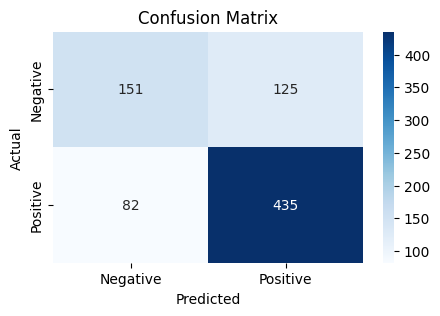

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, dt_pred)

# Create a heatmap with seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

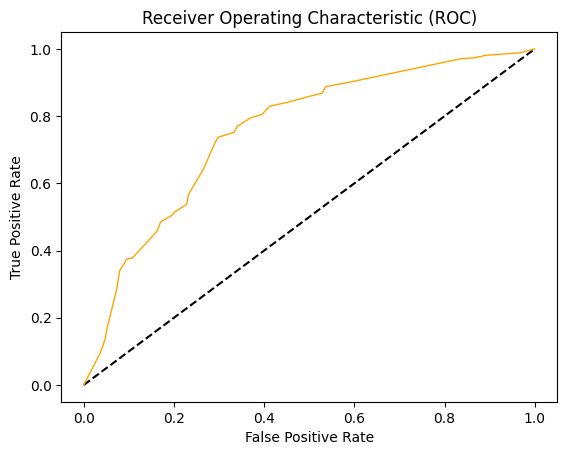

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, dt_probas[:,1])
roc_auc = auc(fpr, tpr)

# plot the curve
import matplotlib.pyplot as plt
plt.figure()
#x=y for comparison
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='orange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

In [ ]:
# calculate the AUC score for ROC curve

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, dt_probas[:,1])
print('AUC Score = ',auc)

AUC Score =  0.7557886917276372


### Precision-Recall Curve

Text(0.5, 1.0, 'Precision-Recall Curve')

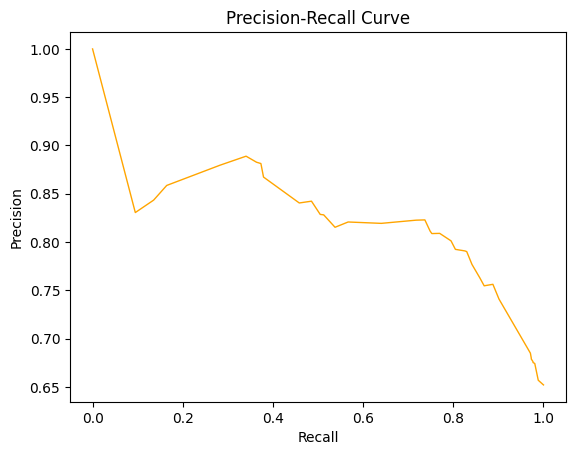

In [ ]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, dt_probas[:,1])

plt.figure()
plt.plot(recall, precision, color='orange', lw=1, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [ ]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, dt_probas[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.82


# Random Forest Classifier

## Model Creation

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

In [ ]:
params = {
    'max_depth': [7, 9, 10],
    'n_estimators': [20, 25],
    'min_samples_leaf': [5, 7],
    'min_samples_split': [2],
    'max_leaf_nodes': [25, 30, 35]
}

# find best hyper-parameters
gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=params,
    cv = None,
    scoring='accuracy'
)
gs_rf.fit(X_train, y_train)

print(gs_rf.best_params_)

# find best model score
print(gs_rf.score(X_test, y_test))

{'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 25}
0.742749054224464


In [ ]:
# create decision tree regressor object
rf = RandomForestClassifier(n_estimators = 25, random_state = 0, max_depth = 9, max_leaf_nodes = 30, min_samples_leaf=5, min_samples_split=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=30, min_samples_leaf=5,
                       n_estimators=25, random_state=0)

In [ ]:
#Predict the response for test dataset
rf_pred = rf.predict(X_test)

In [ ]:
rf_probas = rf.predict_proba(X_test)

##Tree Visualization and Result Analysis

### Tree Visualization

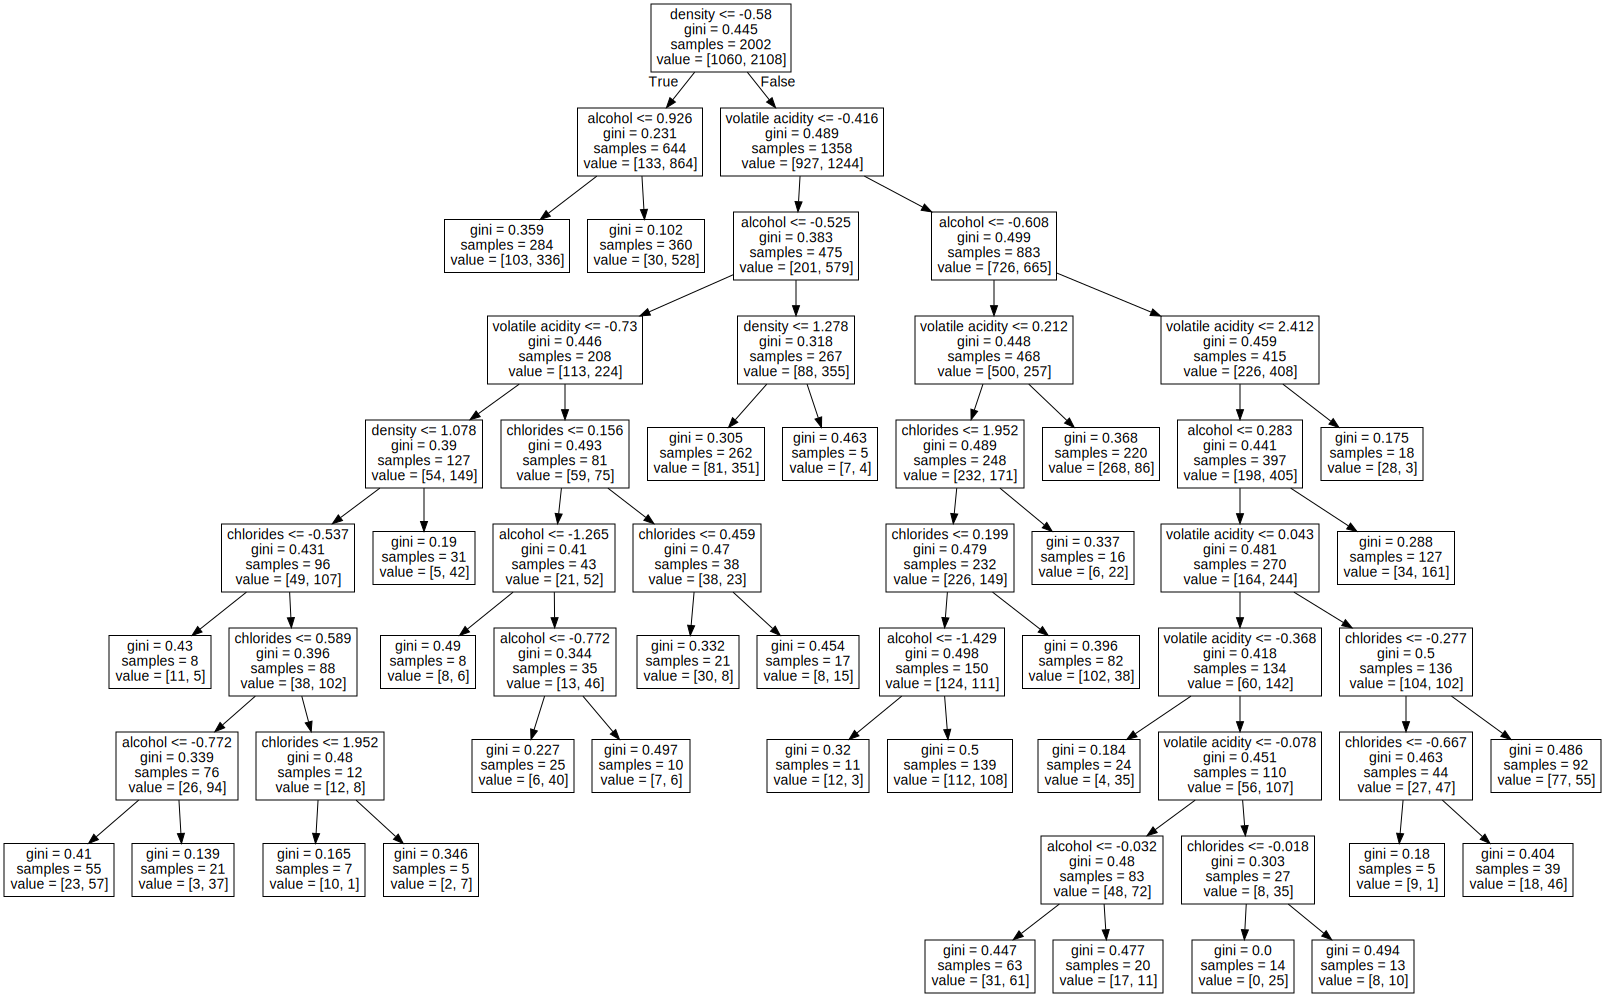

In [ ]:
#visualize using graphviz or treeviz
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(rf.estimators_[0], out_file = None,
               feature_names =['density', 'alcohol', 'chlorides', 'volatile acidity'])
graph = graphviz.Source(dot_data)
graph


### Classification Report

In [ ]:
# metrics
print("-------------------Random Forest Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, rf_pred)))
print(classification_report(y_test,rf_pred))
print('Predicted labels: ', rf_pred)
print('Accuracy: ', accuracy_score(y_test, rf_pred))


-------------------Random Forest Model Report------------------------
accuracy = 0.742749054224464
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       276
           1       0.77      0.87      0.81       517

    accuracy                           0.74       793
   macro avg       0.72      0.69      0.70       793
weighted avg       0.73      0.74      0.73       793

Predicted labels:  [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1

### Confusion Matrix

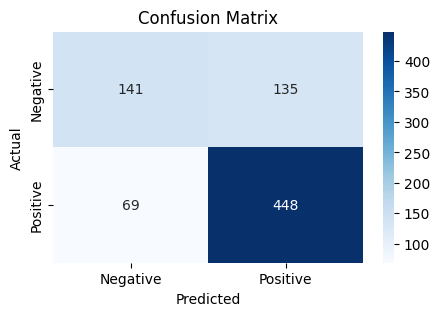

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

# Create a heatmap with seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC-Curve

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

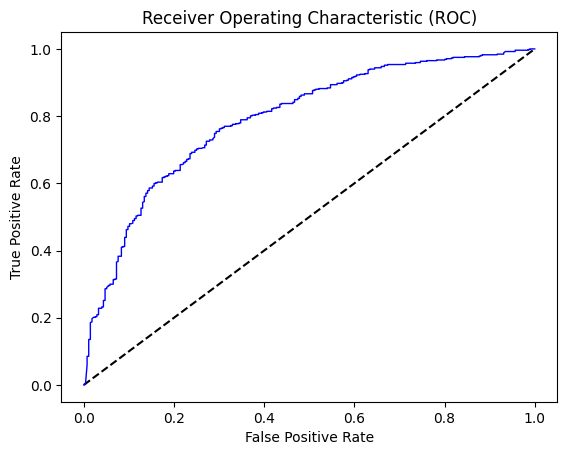

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rf_probas[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
#x=y for comparison
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

In [ ]:
# calculate the AUC score for ROC curve

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, rf_probas[:,1])
print('AUC Score = ',auc)

AUC Score =  0.7917647800857792


### Precision-Recall Curve

Text(0.5, 1.0, 'Precision-Recall Curve')

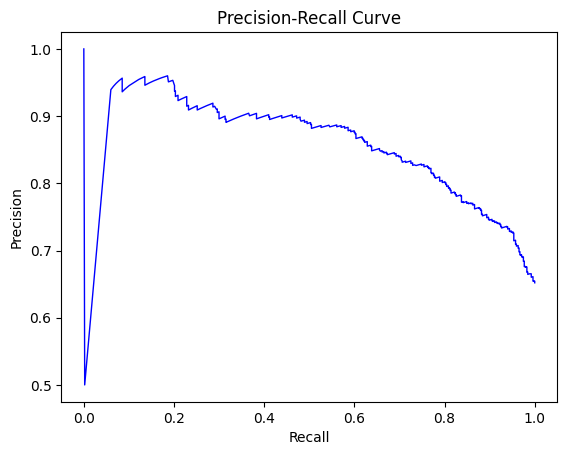

In [ ]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, rf_probas[:,1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=1, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [ ]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, rf_probas[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


# Adaboost Classifier

## Model Creation

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimators': [200, 250, 300],
    'learning_rate': [0.1, 0.5, 1.0]
}

# find best hyper-parameters
gs_ad = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=0),
    param_grid=params,
    cv=None,
    scoring='accuracy'
)
gs_ad.fit(X_train, y_train)

print(gs_ad.best_params_)
# find best model score
print(gs_ad.score(X_test, y_test))

{'learning_rate': 0.1, 'n_estimators': 300}
0.7326607818411097


In [ ]:
#Predict the response for test dataset
ad = AdaBoostClassifier(learning_rate=0.1, n_estimators=300)
ad.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=300)

In [ ]:
ad_pred = ad.predict(X_test)

In [ ]:
ad_probas = ad.predict_proba(X_test)

## Tree Visualization and Result Analysis

### Tree Visualization

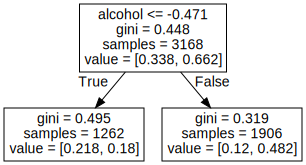

In [ ]:
#visualize using graphviz or treeviz
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(ad.estimators_[0], out_file = None,
               feature_names =['density', 'alcohol', 'chlorides', 'volatile acidity'])
graph = graphviz.Source(dot_data)
graph

### Classification Report

In [ ]:
# classification report
print("-------------------Adaboost Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, ad_pred)))
print(classification_report(y_test,ad_pred))
print('Predicted labels: ', ad_pred)
print('Accuracy: ', accuracy_score(y_test, ad_pred))

-------------------Adaboost Model Report------------------------
accuracy = 0.7326607818411097
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       276
           1       0.76      0.86      0.81       517

    accuracy                           0.73       793
   macro avg       0.71      0.68      0.68       793
weighted avg       0.72      0.73      0.72       793

Predicted labels:  [1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0
 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1

### Confusion Matrix

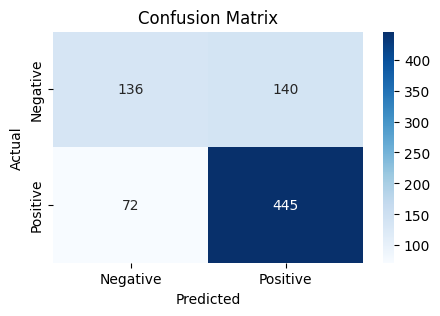

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, ad_pred)

# Create a heatmap with seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

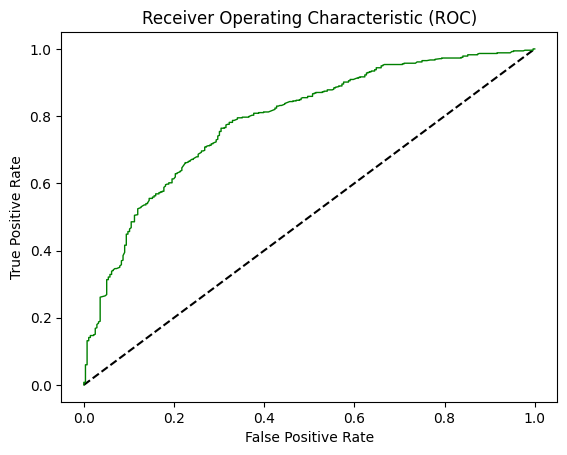

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ad_probas[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
#x=y for comparison
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

In [ ]:
# calculate the AUC score for ROC curve

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, ad_probas[:,1])
print('AUC Score = ',auc)

AUC Score =  0.7878612676253749


### Precision-Recall Curve

Text(0.5, 1.0, 'Precision-Recall Curve')

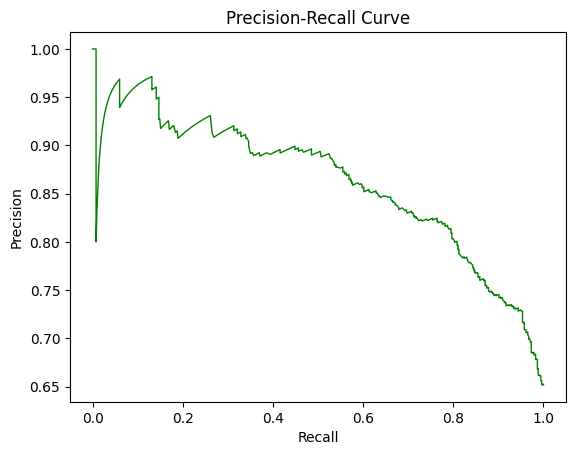

In [ ]:
# precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, ad_probas[:,1])

plt.figure()
plt.plot(recall, precision, color='green', lw=1, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [ ]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, ad_probas[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


# XGBoost Classifier

## Model Creation

In [ ]:
!pip install xgboost
import xgboost as xgb
import xgboost as xgb
import multiprocessing
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2, random_state=0) # uses however many cpus you have available
params = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 6, 7],
    'max_leaves': [20, 25, 30]
}

# find best hyper-parameters
gs_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=params,
    cv=None,
    scoring='accuracy'
)
gs_xgb.fit(X_train, y_train)
print(gs_xgb.best_score_)
print(gs_xgb.best_params_)

0.7531568167207381
{'learning_rate': 0.01, 'max_depth': 6, 'max_leaves': 25, 'n_estimators': 200}


In [ ]:
xgb_dt = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=6, max_leaves=25)
xgb_dt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=25,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_pred = xgb_dt.predict(X_test)

In [ ]:
xgb_probas = xgb_dt.predict_proba(X_test)

##Tree Visualization and Result Analysis

### Tree Visualization

<Figure size 3000x2000 with 0 Axes>

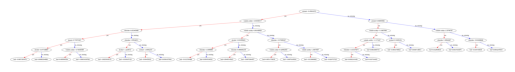

In [ ]:
#visualize using graphviz or treeviz
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(30, 20))  # Adjust the size as needed
xgb.plot_tree(xgb_dt, num_trees=0, figsize=(20, 10))  # Increase size here too
plt.show()

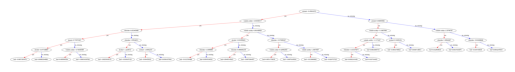

In [ ]:
from numpy import loadtxt
from xgboost import plot_tree
plot_tree(xgb_dt)
plt.show()

### Classification Report

In [ ]:
# classification report
print("-------------------XGBoost Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, xgb_pred)))
print(classification_report(y_test,xgb_pred))
print('Predicted labels: ', xgb_pred)
print('Accuracy: ', accuracy_score(y_test, xgb_pred))

-------------------XGBoost Model Report------------------------
accuracy = 0.7377049180327869
              precision    recall  f1-score   support

           0       0.67      0.50      0.57       276
           1       0.76      0.87      0.81       517

    accuracy                           0.74       793
   macro avg       0.71      0.68      0.69       793
weighted avg       0.73      0.74      0.73       793

Predicted labels:  [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 

### Confusion Matrix

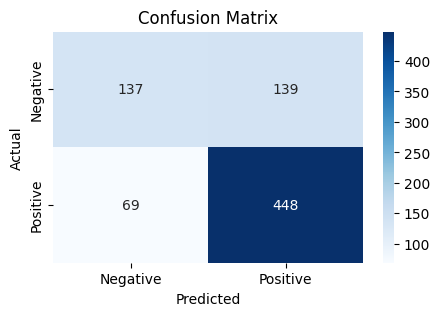

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, xgb_pred)

# Create a heatmap with seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

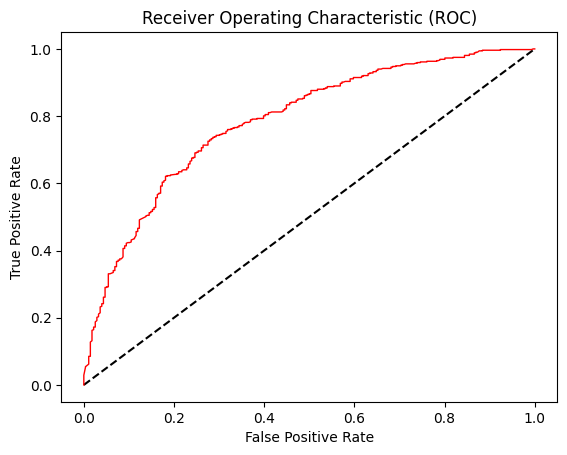

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, xgb_probas[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
#x=y for comparison
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

In [ ]:
# calculate the AUC score for ROC curve

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, xgb_probas[:,1])
print('AUC Score = ',auc)

AUC Score =  0.7845849802371541


### Precision-Recall Curve

Text(0.5, 1.0, 'Precision-Recall Curve')

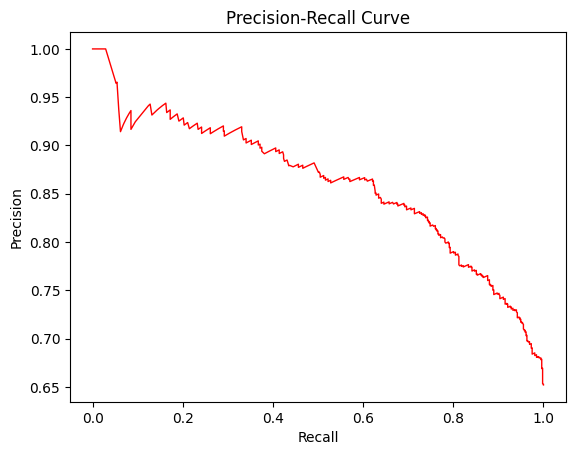

In [ ]:
# precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, xgb_probas[:,1])

plt.figure()
plt.plot(recall, precision, color='red', lw=1, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [ ]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, xgb_probas[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86
